# Setup

In [1]:
%pip install pyshark
%pip install nest_asyncio
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import nest_asyncio
nest_asyncio.apply()

In [6]:
import os
import sys
sys.path.append('..')
from src.visualization.visualization import Visualization
from src.preprocessors.pcap_preprocessor import PcapPreprocessor

preprocessor = PcapPreprocessor()
visualization = Visualization()

Run only if you have new datasets to upload

In [ ]:
# dataset_files = [('data/2024-10-23-Redline-Stealer-infection-traffic.pcap','unknown')]
# dataset_files = [('data/normal_1.pcap','allow'), ('data/injection_normal1', 'deny')]
dataset_files = [('data/injection_normal1.pcap','deny')]


base_data = preprocessor.load_datasets(dataset_files)

Run only if you have new datasets to upload

In [ ]:
# preprocessor.get_correct_column_type(base_data)
preprocessor.preprocess_dataframe(base_data)

# Visualization

In [8]:
bd_data = preprocessor.get_all_data(sample_size=50000)

##### Get geral information

In [9]:
print(bd_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38807 entries, 0 to 38806
Columns: 940 entries, _id to png.text_string
dtypes: float64(378), object(562)
memory usage: 278.3+ MB
None


##### Get Column information

In [10]:
visualization.column_info(bd_data)

,0
_id,object
dataset,object
label,object
sll.pkttype,float64
sll.hatype,float64
sll.halen,float64
sll.src_eth,object
sll.unused,object
sll.etype,object
ip.version,float64


##### Get first n rows

In [11]:
visualization.first_x_rows(bd_data, 5)

##### Clean the data - missing values

In [12]:
base_data_cleaned = visualization.filter_columns_by_missing_values(bd_data, 0.85)

Columns with 0% Missing Values: ['_id', 'dataset', 'label']
Columns with >85% Missing Values: ['tcp.connection_syn', 'tcp.options_mss', 'tcp.options_mss_val', 'tcp.options_sack_perm', 'tcp.options_wscale', 'tcp.options_wscale_shift', 'tcp.options_wscale_multiplier', 'tcp.analysis_flags', 'tcp.analysis_window_full', 'sll.eth_padding', 'http.', 'http.request_method', 'http.request_uri', 'http.request_uri_path', 'http.request_uri_query', 'http.request_uri_query_parameter', 'http.request_version', 'http.accept_encoding', 'http.request_line', 'http.host', 'http.accept', 'http.user_agent', 'http.connection', 'http.cache_control', 'http.request', 'http.request_full_uri', 'icmp.type', 'icmp.code', 'icmp.checksum', 'icmp.checksum_status', 'icmp.ident', 'icmp.ident_le', 'icmp.seq', 'icmp.seq_le', 'icmp.resp_to', 'icmp.resptime', 'icmp.data_time', 'icmp.data_time_relative', 'icmp.data', 'icmp.data_data', 'icmp.data_len', 'http.accept_language', 'http.referer', 'http.cookie', 'http.cookie_pair', '

Column,Missing Percentage
sll.pkttype,22.694359
sll.hatype,22.694359
sll.halen,22.694359
sll.src_eth,22.694359
sll.unused,22.694359
sll.etype,40.245317
ip.version,18.481202
ip.hdr_len,18.586853
ip.dsfield,18.586853
ip.dsfield_dscp,18.586853


##### View missing values heatmap

/home/kirim/Documents/University/PRI/project/tests/../src/visualization/visualization.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data.replace("", np.nan, inplace=True)
/home/kirim/Documents/University/PRI/project/tests/../src/visualization/visualization.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data.replace("null", np.nan, inplace=True)


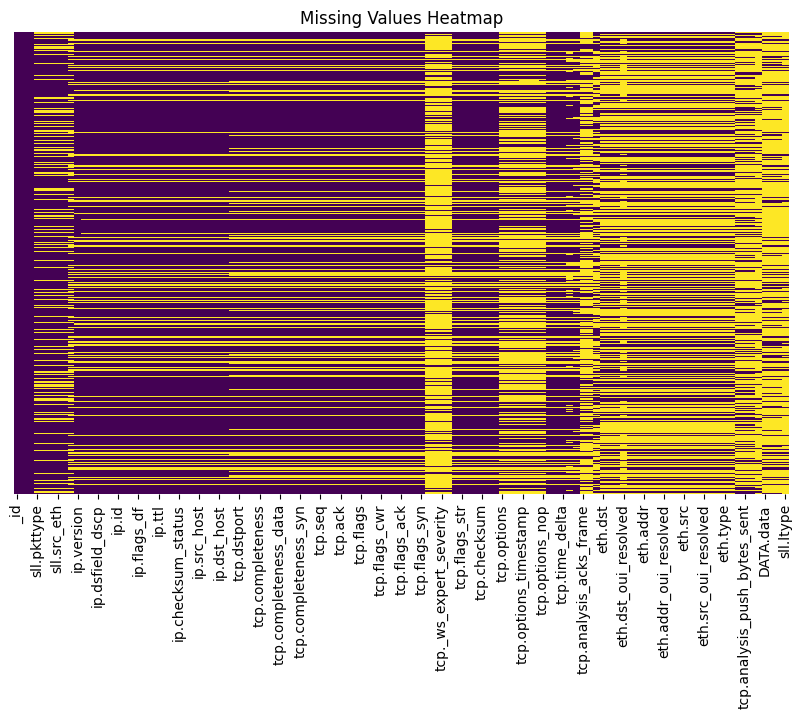

In [13]:
visualization.plot_missing_values_heatmap(base_data_cleaned)

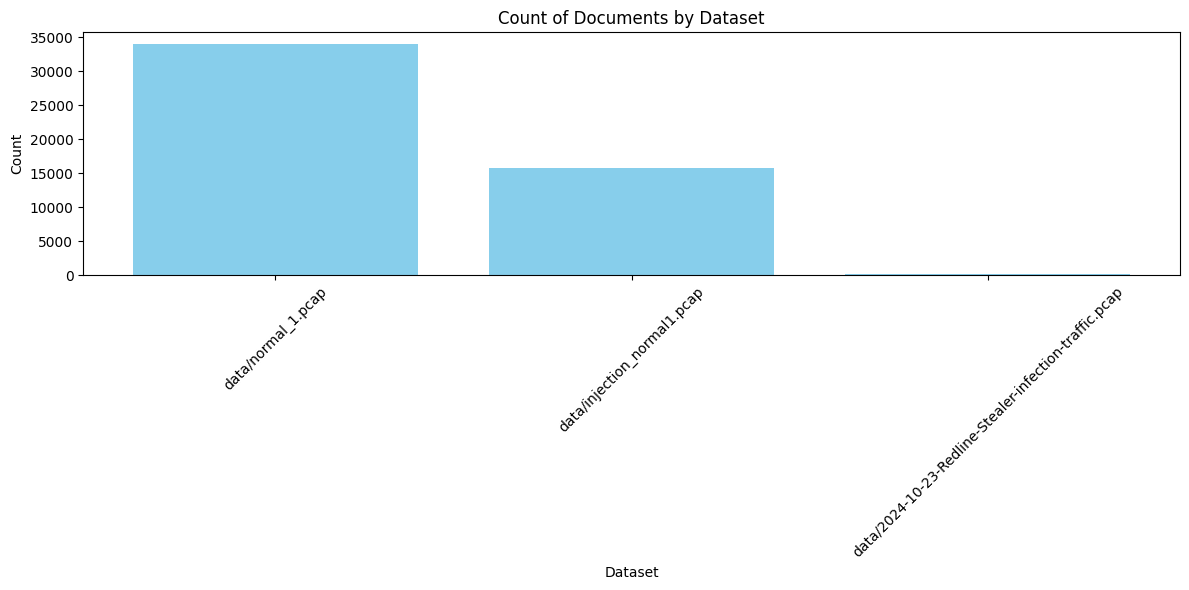

In [8]:
visualization.plot_dataset_counts(bd_data)

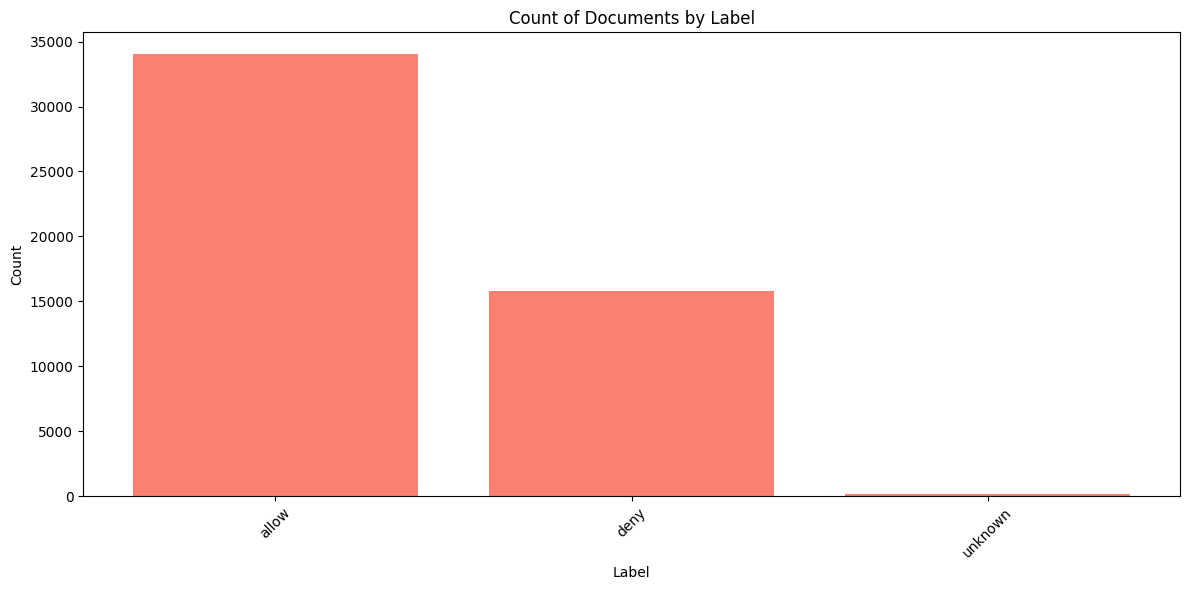

In [9]:
visualization.plot_label_counts(bd_data)

In [ ]:
visualization.plot_tcp_source_ports(bd_data)

In [ ]:
visualization.plot_udp_source_ports(base_data)

In [ ]:
visualization.plot_top_ip_addresses(base_data)

In [ ]:
visualization.plot_top_ip_dest_addresses(base_data)

In [ ]:
visualization.plot_tcp_flags_distribution(base_data)

In [ ]:
visualization.plot_dns_queries(base_data)

In [ ]:
visualization.plot_correlation_matrix(bd_data)

In [ ]:
visualization.plot_tcp_stream_time_series(base_data)

In [ ]:
visualization.plot_distribution(base_data)